# ML task: Lara Mason

In the following, we'll examine the Titanic survival dataset. 


# Data investigation and cleaning

In [1]:
#Let's take a look at the data in the dataset, which is downloaded locally from google drive:
!head titanic.csv

Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,3 pclass,Mr. Owen Harris Braund,male,22.0,1,0,7.25
1,1 pclass,Mrs. John Bradley (Florence Briggs Thayer) Cumings,female,38.0,1,0,71.2833
1,3 pclass,Miss. Laina Heikkinen,female,26.0,0,0,7.925
1,1 pcl,Mrs. Jacques Heath (Lily May Peel) Futrelle,,35.0,1,0,53.1
0,3 pclass,Mr. William Henry Allen,male,35.0,0,0,8.05
0,3 pclass,Mr. James Moran,male,27.0,0,0,8.4583
0,1-pclas,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
0,3-pclass,Master. Gosta Leonard Palsson,male,2.0,3,1,21.075
1,3-pclass,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333


Using pandas to read in the data:

In [2]:
#using the pandas tool
import pandas as pd
data = pd.read_csv("titanic.csv")

Let's examine some of the data by looking at the first twenty rows:

In [3]:
head = data[:20]
head

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3 pclass,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1 pclass,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3 pclass,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1 pcl,Mrs. Jacques Heath (Lily May Peel) Futrelle,NaN,35.0,1,0,53.1000
4,0,3 pclass,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3 pclass,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1-pclas,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3-pclass,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3-pclass,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2-pclass,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


The samples contain some inconsistencies - "Pclass", which likely refers to the class of travel, is inconsistently defined, and will need to be addressed. 
Some passengers do not have their sex recorded, so the NaNs will need to be handled correctly.
At least one passenger has a negative age recorded, which is an error and will need to be handled correctly.


In [4]:
# let's check the size of the data:
print("len(data) = ", len(data))
print("data.shape = ", data.shape)

len(data) =  887
data.shape =  (887, 8)


### Let's start to address a few of the inconsistencies, starting with the ages

In [5]:
print('The max age recorded is:',
      (data['Age'].max() ))
print('Number of passengers with negative age:',
      (data['Age'] < 0).sum() )
print('Number of passengers with ages > 110:',
      (data['Age'] > 110).sum() )
print('Number of passengers with missing age: ',
      data['Age'].isnull().sum() )

The max age recorded is: 240.0
Number of passengers with negative age: 12
Number of passengers with ages > 110: 12
Number of passengers with missing age:  0


The maximum age recoded is 240, which indicates that there are a few incorrectly recorded ages. 12 passengers out of 887 have negative age, and another 12 have an age greater than 110 which is probably an error. Let's remove them (we could also fill the columns with mean or median values or something similar, but as this is a small number of datapoints it doesn't cost too much to remove them, and we avoid the worry of filling them incorrectly.)

In [6]:
data = data[data.Age > 0]
data = data[data.Age < 110]
print("len(data) = ", len(data))
print("data.shape = ", data.shape)

len(data) =  863
data.shape =  (863, 8)


### Let's check the entries in the 'Sex' column:

In [7]:
print('Number of passengers with missing sex: ',
      data['Sex'].isnull().sum() )
print('Number of passengers with sex recorded as male or female: ',
     (data['Sex']=='male').sum()+ (data['Sex']=='female').sum())

Number of passengers with missing sex:  13
Number of passengers with sex recorded as male or female:  850


The sum of entries with 'male', 'female', and missing values is equal to the total number of rows, so there are no curveball entries in this category. However, there are a few candidates whose 'Sex' is not recorded. Let's see if we can infer the values that are missing.

In [8]:
# let's look at the passengers with no 'Sex' recorded:

data.loc[data['Sex'].isnull(), 'Name']

3         Mrs. Jacques Heath (Lily May Peel) Futrelle
15                     Mrs. (Mary D Kingcome) Hewlett
89                                Mr. Emil Christmann
265                           Mr. Ernst Ulrik Persson
281                         Mr. Edward Arthur Dorking
298                        Miss. Anna Katherine Kelly
363                     Mr. Mauritz Nils Martin Adahl
401                     Mr. Pekka Pietari Hakkarainen
491                         Mr. Edward Roland Stanley
495    Mrs. Hudson J C (Bessie Waldo Daniels) Allison
501                              Miss. Roberta Maioni
526                        Mr. Richard George Hocking
664                         Mr. Knud Paust Rommetvedt
Name: Name, dtype: object

In [9]:
# we can fill the missing values for 'Sex' by checking whether the Name entry features 'Mr', 'Miss', or 'Mrs' 
# - this will give us a good approximation

import numpy as np

data.loc[data['Name'].str.contains('Mrs.'), 'Sex'] = "female"
data.loc[data['Name'].str.contains('Miss.'), 'Sex'] = "female"
data.loc[data['Name'].str.contains('Mr.'), 'Sex'] = "male"

In [10]:
# check that it worked:

data.loc[data['Sex'].isnull(), 'Name']

Series([], Name: Name, dtype: object)

### Let's do something similar for the Pclass, and make them uniform:

In [11]:
data.loc[data['Pclass'].str.contains('1'), 'Pclass'] = '1'
data.loc[data['Pclass'].str.contains('2'), 'Pclass'] = '2'
data.loc[data['Pclass'].str.contains('3'), 'Pclass'] = '3'

### Next, let's use similar techniques to investigate if siblings/spouses aboard and parents/children aboard have negative or missing values:

In [12]:
print('Number of passengers with negative Siblings/Spouses Aboard:',
      (data['Siblings/Spouses Aboard'] < 0).sum() )
print('Number of passengers with missing Siblings/Spouses Aboard: ',
      data['Siblings/Spouses Aboard'].isnull().sum() )
print('Number of passengers with negative Parents/Children Aboard:',
      (data['Parents/Children Aboard'] < 0).sum() )
print('Number of passengers with missing Parents/Children Aboard: ',
      data['Parents/Children Aboard'].isnull().sum() )

Number of passengers with negative Siblings/Spouses Aboard: 11
Number of passengers with missing Siblings/Spouses Aboard:  0
Number of passengers with negative Parents/Children Aboard: 12
Number of passengers with missing Parents/Children Aboard:  0


No missing values, but again a few points with negative values. Let's have a look at the data behaviour:

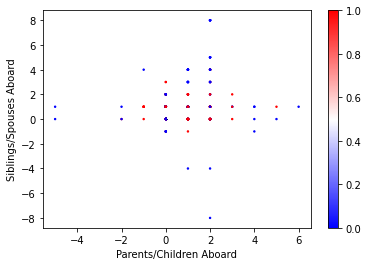

In [13]:
import matplotlib.pyplot as plt

plt.scatter(data['Parents/Children Aboard'],
            data['Siblings/Spouses Aboard'],
            c=data['Survived'], # maps different colors depending on whether a person survived
            s=2, # change the marker size
            cmap='bwr') # select colormap
plt.gca().update(dict(xlabel='Parents/Children Aboard', ylabel='Siblings/Spouses Aboard'));
plt.colorbar();

It looks like the behaviour is similar across positive and negative values, so I'll assume that the negative was an error and replace those entries with their absolute values. We could also remove those entries completely.

In [14]:
data['Parents/Children Aboard'] = data['Parents/Children Aboard'].abs()
data['Siblings/Spouses Aboard'] = data['Siblings/Spouses Aboard'].abs()

### Lastly, let's investigate the Fares

In [15]:
print('The max Fare recorded is:',
      (data['Fare'].max() ))
print('The median Fare recorded is:',
      (data['Fare'].median() ))

The max Fare recorded is: 800069.55
The median Fare recorded is: 14.5


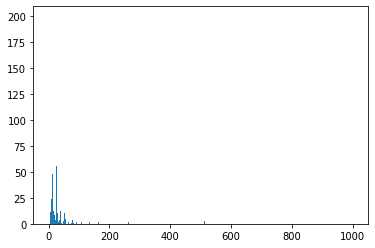

In [16]:
#It seems there's an outlier in the fares - let's look at the distribution
fares = data["Fare"]

plt.show()
plt.hist(fares,bins=np.arange(1001));

The entry recorded as 800069.55 is most likely an error. I'll remove anything above 600.

In [17]:
data = data[data.Fare < 600]

### A last check that everything looks good:

In [18]:
data['Pclass'] = data['Pclass'].astype(int)
data['Age'] = data['Age'].astype(int)

In [19]:
head = data[:10]
head

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,male,38,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,male,35,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35,0,0,8.0500
5,0,3,Mr. James Moran,male,27,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,male,27,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,male,14,1,0,30.0708


In [20]:
print("len(data) = ", len(data))
print("data.shape = ", data.shape)

len(data) =  848
data.shape =  (848, 8)


# Data visualisation

Let's visualise the data to get a better understanding

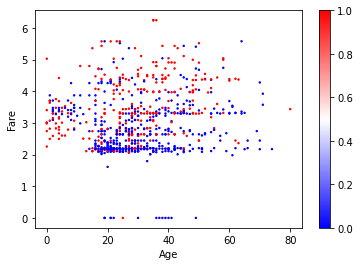

In [21]:
# survived is displayed in red, and did not survive in blue


plt.scatter(data['Age'],
            np.log1p(data['Fare']),
            c=data['Survived'], # maps different colors depending on whether a person survived
            s=2, # change the marker size
            cmap='bwr') # select colormap
plt.gca().update(dict(xlabel='Age', ylabel='Fare'));
plt.colorbar();

A trend for younger passengers and higher fares leading to better survival seems to be evident at a glance from this plot, where the upper left corner appears to be more densely populated with red dots than the lower right.

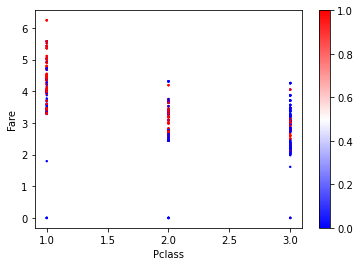

In [22]:
# Let's compare passenger class and fare

plt.scatter(data['Pclass'],
            np.log1p(data['Fare']),
            c=data['Survived'], # maps different colors depending on whether a person survived
            s=2, # change the marker size
            cmap='bwr') # select colormap
plt.gca().update(dict(xlabel='Pclass', ylabel='Fare'));
plt.colorbar();

There seem to have been a large spread in fares, but it appears that passengers in first class were more likely to survive, and that the trend in fares is generally as expected, with first class being the most expensive.

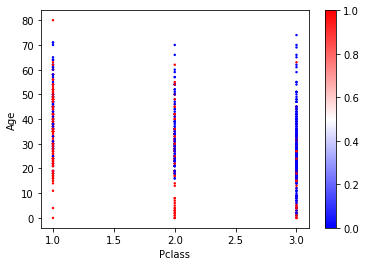

In [23]:
# Let's compare passenger class and age

plt.scatter(data['Pclass'],
            data['Age'],
            c=data['Survived'], # maps different colors depending on whether a person survived
            s=2, # change the marker size
            cmap='bwr') # select colormap
plt.gca().update(dict(xlabel='Pclass', ylabel='Age'));
plt.colorbar();

It's clear again that first class passengers are more likely to survive than third. Younger passengers in first class also have an excellent survival rate, as we can imagine children and babies were given priority on lifeboats. The same is true of younger passengers in second class.

# Correlations

Let's check the correlations between the features in the dataset

In [24]:
correlation_df = data.corr()
print(correlation_df)

                         Survived    Pclass       Age  \
Survived                 1.000000 -0.345230 -0.068006   
Pclass                  -0.345230  1.000000 -0.388808   
Age                     -0.068006 -0.388808  1.000000   
Siblings/Spouses Aboard -0.027890  0.074316 -0.284343   
Parents/Children Aboard  0.098548  0.013686 -0.195138   
Fare                     0.258839 -0.557676  0.117881   

                         Siblings/Spouses Aboard  Parents/Children Aboard  \
Survived                               -0.027890                 0.098548   
Pclass                                  0.074316                 0.013686   
Age                                    -0.284343                -0.195138   
Siblings/Spouses Aboard                 1.000000                 0.412377   
Parents/Children Aboard                 0.412377                 1.000000   
Fare                                    0.157772                 0.214887   

                             Fare  
Survived                

The closer to 1(-1), the stronger the positive(negative) correlation for two variables. A value close to 0 indicates minimal correlation. The largest correlations visible are 'Parents/Children Aboard' and 'Siblings/Spouses Aboard', which are positively correlated. We can understand this by as relating families on board. 

A negative correlation is also evident between Passenger class and Age. This is visible from the final plot in the previous section; younger people are more likely to be in 3rd class, and older people more likely in first. 

There is a strong negative correlation between fare and passenger class: the higher the fare, the closer to first class the passenger is likely to be.

Correlated variables do not necessarily degrade machine learning performance, but they should be handled with care for interpretability and stability. In the following, we will play with removing the most correlated variables to improve performance of a simple algorithm.


# Machine learning / analysis of feature impact on survival

Let's use a simple k nearest neighbours algorithm to make some predictions using the data

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#removing the fare, age, and siblings/spouses features:
features = data[['Parents/Children Aboard', 'Pclass']].copy()

# the 'Sex' feature is a string. We need to convert it to a numeric representation:
onehot = pd.get_dummies(data['Sex'], prefix='Sex')
features = features.join(onehot)

answers = data["Survived"]

model = KNeighborsClassifier(n_neighbors=6)
model.fit(features[100:], answers[100:])

test_predictions = model.predict(features[:100])
print("Test accuracy:", accuracy_score(answers[:100], test_predictions))

Test accuracy: 0.75


We can achieve reasonable accuracy removing the correlated variables and using a very basic ML toolkit from sklearn. Lastly, let's assess the impact of fare on survival probability by using a quantile-based discretisation function, which uses percentiles based on distribution:

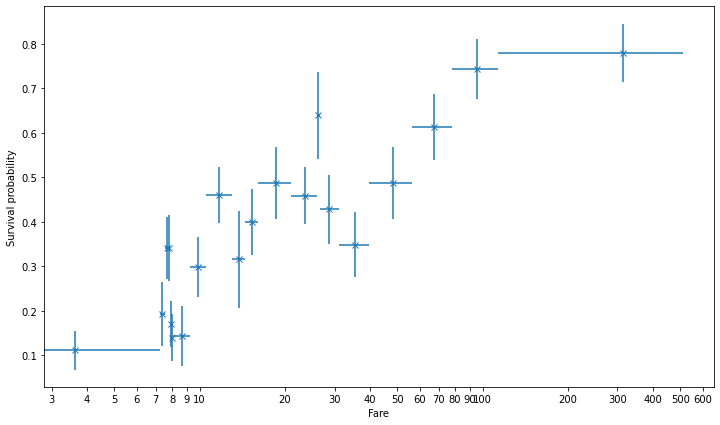

In [27]:
from matplotlib.ticker import ScalarFormatter

data['qFare'] = pd.qcut(data.Fare, 20, duplicates='drop')

sur_vs_price = data.groupby('qFare').Survived.mean()
sur_vs_price_e = data.groupby('qFare').Survived.std() \
                        / data.groupby('qFare').Survived.count()**0.5

fig = plt.figure(figsize=(12, 7))
plt.errorbar(x=sur_vs_price.index.categories.mid,
             y=sur_vs_price.values,
             yerr=sur_vs_price_e.values,
             xerr=(
                 pd.IntervalIndex(sur_vs_price.index).right - 
                 pd.IntervalIndex(sur_vs_price.index).left
               ) / 2,
             fmt='x')
plt.gca().set_xscale('log')
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().set_xticks(
              list(range(3, 10)) +
              list(range(10, 100, 10)) +
              list(range(100, 700, 100))
            )

plt.xlabel('Fare')
plt.ylabel('Survival probability');

A clear trend is visible, where higher fares lead to a more likely survival.